In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [82]:
media = pd.read_csv("mediacompany.csv")
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [83]:
media.drop(['Unnamed: 7'], axis = 1, inplace = True)
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
Date                   80 non-null object
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [84]:
#converting Date column to DateTime format
media['Date'] = pd.to_datetime(media['Date'])

In [85]:
media['Days'] = media['Date'] - media['Date'].min()

In [86]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,0 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,1 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,2 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,3 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,4 days


In [87]:
media['Days'] = media['Days'] + pd.Timedelta(days = 1)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [101]:
media['Days'] = media['Days'].astype(str)
media['Days'] = media['Days'].str.split(expand = True)[0]

media['Days'] = media['Days'].astype(int)
media.dtypes

Date                   datetime64[ns]
Views_show                      int64
Visitors                        int64
Views_platform                  int64
Ad_impression                   int64
Cricket_match_india             int64
Character_A                     int64
Days                            int32
dtype: object

In [144]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days,day_of_week
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,6


<Figure size 1440x360 with 0 Axes>

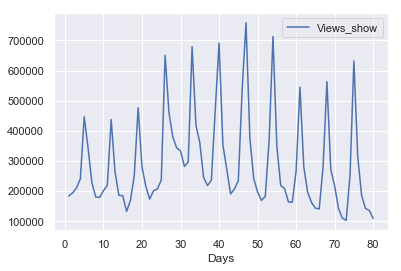

In [108]:
media.plot.line(x = 'Days', y= 'Views_show')

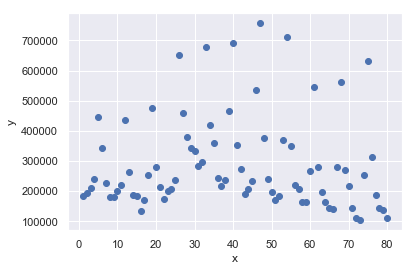

In [112]:
plt.scatter(media.Days, media.Views_show, alpha=1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

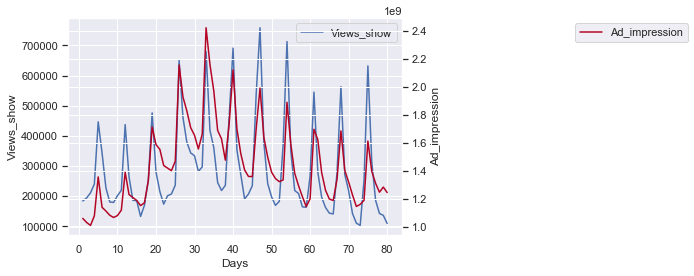

In [141]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

media.plot(x = 'Days', y= 'Views_show', kind = 'line', ax = ax1, legend = True)
media.plot(x = 'Days', y= 'Ad_impression', kind = 'line', ax = ax2, colormap = 'coolwarm_r')

ax1.set_ylabel("Views_show")
ax2.set_ylabel("Ad_impression")
plt.legend(bbox_to_anchor=(1.5, 1), loc="upper left")

In [143]:
media['day_of_week'] = media['Date'].dt.dayofweek

In [148]:
media['Date'].dt.day_name

<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x0000015C653ABF28>>

In [151]:
media['name_of_day'] = np.where(media['day_of_week'] == 6, 'sunday', np.NaN)

In [152]:
media

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days,day_of_week,name_of_day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,2,nan
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,3,nan
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,4,nan
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,5,nan
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,6,sunday
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,6,0,nan
6,2017-03-07,227313,1363579,1821742,1113811802,0,0,7,1,nan
7,2017-03-08,180313,1353483,1795456,1083475096,0,0,8,2,nan
8,2017-03-09,178800,1345428,1794157,1067636147,0,0,9,3,nan
9,2017-03-10,201180,1344540,1834967,1081234843,0,0,10,4,nan
